In [49]:
import pandas as pd
data = pd.read_csv("botswana.tsv", sep='\t')
data.head(5)

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,evermarr,agefm,heduc,urban,electric,radio,tv,bicycle
0,0,18,10,catholic,4.0,1.0,1.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0
1,2,43,11,protestant,2.0,1.0,1.0,1,20.0,14.0,1,1.0,1.0,1.0,1.0
2,0,49,4,spirit,4.0,1.0,0.0,1,22.0,1.0,1,1.0,1.0,0.0,0.0
3,0,24,12,other,2.0,1.0,0.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0
4,3,32,13,other,3.0,1.0,1.0,1,24.0,12.0,1,1.0,1.0,1.0,1.0


In [2]:
import statsmodels
import scipy as sc
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.graphics.regressionplots import plot_leverage_resid2
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


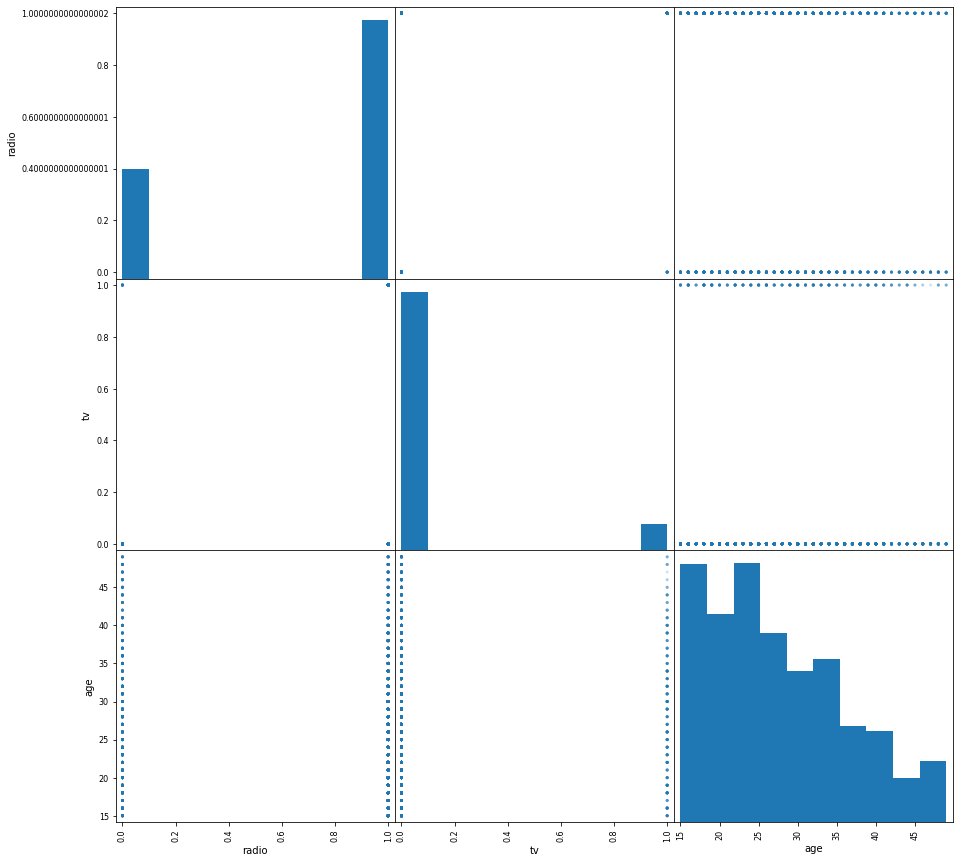

In [50]:
pd.plotting.scatter_matrix(data[['religion', 'radio', 'tv', 'age']], alpha=0.2, 
                                 figsize=(15, 15), diagonal='hist')
pylab.show()

1.

In [70]:
len(np.unique(data.religion))

4

2.

In [71]:
data.dropna().shape[0]

1834

3.

In [72]:
df = data.copy()
df['nevermarr'] = 0
df.loc[df.agefm.isna(), 'nevermarr'] = 1
del df['evermarr']
df['agefm'].fillna(0, inplace=True)

df.loc[(df.nevermarr == 1) & (df.heduc.isna()), 'heduc'] = -1 

In [74]:
df['heduc'].isna().sum()

123

4.

In [75]:
df['idlnchld_noans'] = 0
df.loc[(df.idlnchld.isna()), 'idlnchld_noans'] = 1
df['idlnchld'].fillna(-1, inplace=True)

df['heduc_noans'] = 0
df.loc[(df.heduc.isna()), 'heduc_noans'] = 1
df['heduc'].fillna(-2, inplace=True)

df['usemeth_noans'] = 0
df.loc[(df.usemeth.isna()), 'usemeth_noans'] = 1
df['usemeth'].fillna(-1, inplace=True)
df.dropna(inplace=True)

In [76]:
shape = df.shape[0] * df.shape[1]
assert shape == 78264, shape

5.

In [17]:
df.columns

Index(['ceb', 'age', 'educ', 'religion', 'idlnchld', 'knowmeth', 'usemeth',
       'agefm', 'heduc', 'urban', 'electric', 'radio', 'tv', 'bicycle',
       'nevermarr', 'idlnchld_noans', 'heduc_noans', 'usemeth_noans'],
      dtype='object')

In [77]:
import statsmodels.formula.api as smf
m1 = smf.ols('ceb ~ age + educ + religion + idlnchld + knowmeth + usemeth +'\
                    'agefm + heduc + urban + electric + radio + tv + bicycle + nevermarr +'\
                    'idlnchld_noans + heduc_noans + usemeth_noans', 
             data=df)
fitted = m1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     412.5
Date:                Mon, 20 Jul 2020   Prob (F-statistic):               0.00
Time:                        18:18:22   Log-Likelihood:                -7732.1
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4328   BIC:                         1.563e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1

/home/max/.local/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


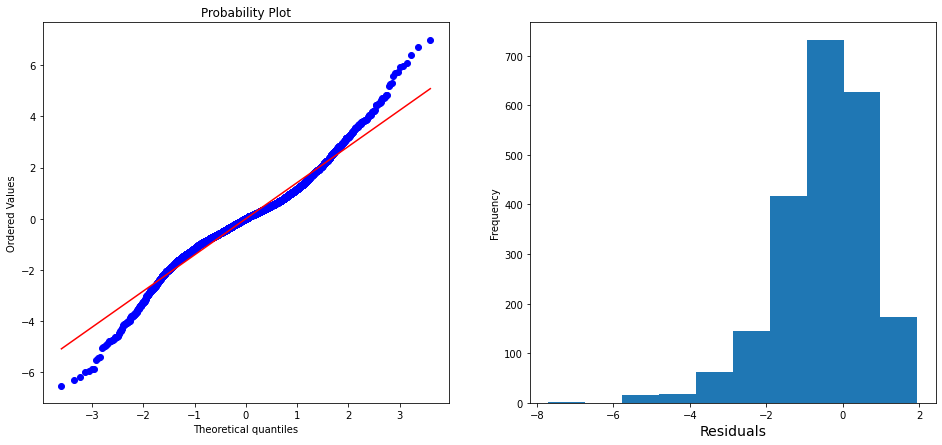

In [78]:
plt.figure(figsize(16,7))
plt.subplot(121)
sc.stats.probplot(fitted.resid, dist="norm", plot=pylab)
plt.subplot(122)
np.log(fitted.resid).plot.hist()
plt.xlabel('Residuals', fontsize=14)
pylab.show()

In [80]:
print('Breusch-Pagan test: p=%e' % sms.het_breuschpagan(fitted.resid, fitted.model.exog)[1])

Breusch-Pagan test: p=1.145293e-225


In [81]:
m2 = smf.ols('ceb ~ age + educ + idlnchld + knowmeth + usemeth +'\
                    'agefm + heduc + urban + electric + bicycle + nevermarr +'\
                    'idlnchld_noans + heduc_noans + usemeth_noans', 
             data=df)
fitted = m2.fit(cov_type='HC1')
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     463.4
Date:                Mon, 20 Jul 2020   Prob (F-statistic):               0.00
Time:                        18:19:04   Log-Likelihood:                -7734.5
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4333   BIC:                         1.559e+04
Df Model:                          14                                         
Covariance Type:                  HC1                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.0698      0.258     -4.

In [82]:
print('Breusch-Pagan test: p=%e' % sms.het_breuschpagan(fitted.resid, fitted.model.exog)[1])

Breusch-Pagan test: p=1.119746e-228


In [83]:
print("F=%f, p=%f, k1=%f" % m1.fit().compare_f_test(m2.fit()))

F=0.919236, p=0.467231, k1=5.000000


In [84]:
m3 = smf.ols('ceb ~ age + educ + idlnchld + knowmeth +'\
                    'agefm + heduc + urban + electric + bicycle + nevermarr +'\
                    'idlnchld_noans + heduc_noans', 
             data=df)
fitted = m3.fit(cov_type='HC1')
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     396.4
Date:                Mon, 20 Jul 2020   Prob (F-statistic):               0.00
Time:                        18:21:36   Log-Likelihood:                -7825.7
No. Observations:                4348   AIC:                         1.568e+04
Df Residuals:                    4335   BIC:                         1.576e+04
Df Model:                          12                                         
Covariance Type:                  HC1                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.1931      0.262     -4.

In [85]:
m2.fit().compare_f_test(m3.fit())

(92.89058230109711, 3.155200948040263e-40, 2.0)

Пункт 10 не полностью правильный